# Plotting distribution of Binomial Tree

In [1]:
import fineng_irfx as fe
import matplotlib.pyplot as plt
import numpy as np
import binomial_tree as bt

### Sample doc strings

print(fe.L1_S.__doc__)

### Building different trees

In [2]:
S0 = 100.0
sigma = 0.1
T = 3.0
K = 250.0
r = 0.02
N = 30

In [3]:
tree_styles = [
    "CRR",
    "JR",
    "v-drift",
    "geometric-centred-strike",
    "arithmetic-centred-strike",
]
BTrees = [bt.BinomialTree(S0, sigma, r, K, T, N, style) for style in tree_styles]

### Comparing probability distributions generated by different trees

In [4]:
def prob_dist(Tree):
    range = np.arange(Tree.N + 1)
    S_Ti = [Tree.S_T(i, Tree.N) for i in range]
    Q_Ti = [Tree.prob(i) for i in range]
    assert abs(sum(Q_Ti) - 1.0) < 1e-7, f"Total prob {sum(Q_Ti)} does not equal to 1"
    return S_Ti, Q_Ti

In [5]:
prob_dist_list = [prob_dist(Tree) for Tree in BTrees]

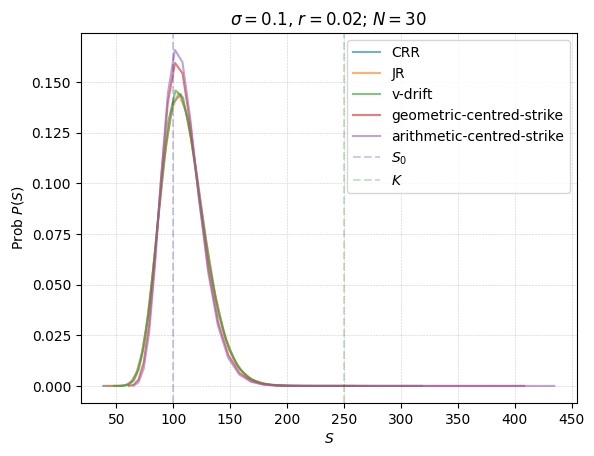

In [6]:
plt.figure()
for i, pd in enumerate(prob_dist_list):
    plt.plot(pd[0], pd[1], "-", label=tree_styles[i], alpha=0.6)
plt.axvline(
    x=S0, color="darkblue", linestyle="--", label="$S_0$", alpha=0.2, linewidth=1.5
)
plt.axvline(
    x=K, color="darkgreen", linestyle="--", label="$K$", alpha=0.2, linewidth=1.5
)
plt.legend()
plt.grid(color="grey", linewidth=0.4, linestyle="--", alpha=0.4)
# plt.ylim([0,0.2])
plt.xlabel(r"$S$")
plt.ylabel("Prob $P(S)$")
plt.title(rf"$\sigma=${sigma}, $r=${r}; $N=${N}")
plt.show()

### Visualise the trees

In [7]:
def generate_tree(Tree):
    N = Tree.N
    T = Tree.T
    all_points = []
    time_axis = []
    t = 0.0
    for n in range(N + 1):
        all_points.append([Tree.S_T(i, n) for i in range(n + 1)])
        assert (
            len(all_points[-1]) == n + 1
        ), f"length of list is {len(all_points[-1])}, expected {n+1}"

        time_axis.append([t for i in range(n + 1)])
        t = t + T / N
    assert len(all_points) == N + 1
    return time_axis, all_points

In [8]:
tree_data = [generate_tree(BTrees[i]) for i, style in enumerate(tree_styles)]

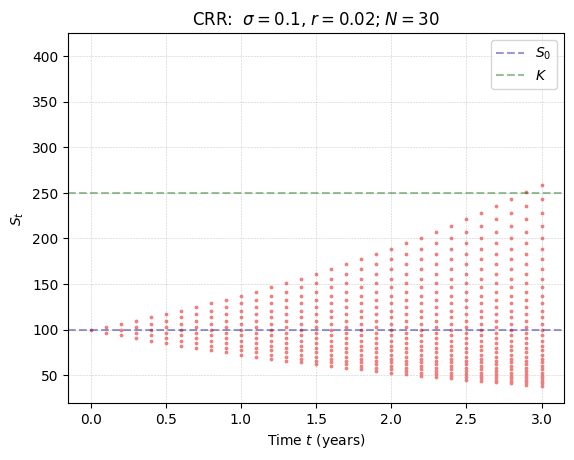

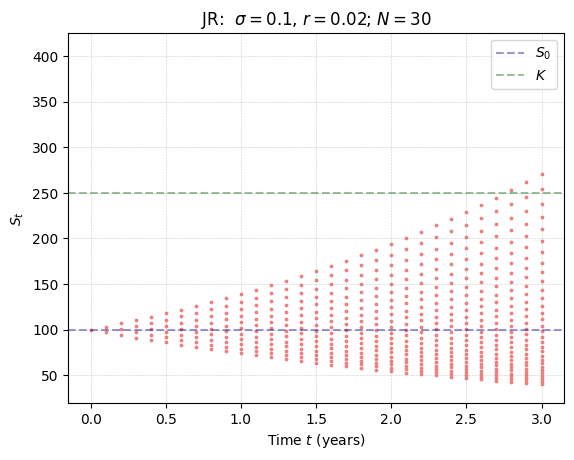

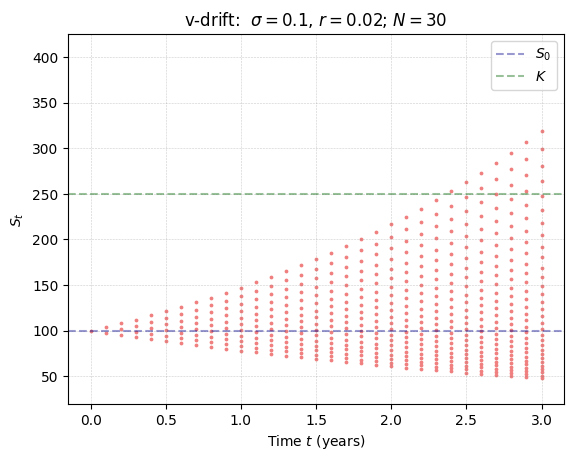

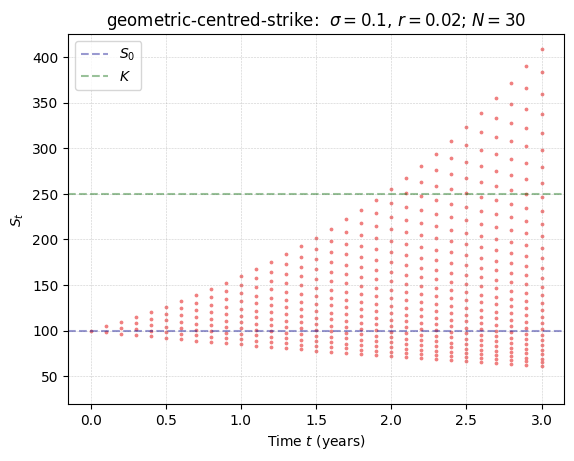

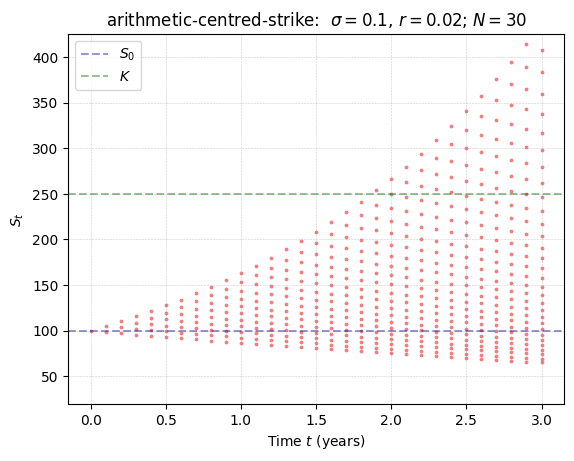

In [12]:
for j, (time_axis, all_points) in enumerate(tree_data):
    plt.figure()
    for i in range(len(time_axis)):
        plt.scatter(time_axis[i], all_points[i], s=3, color="lightcoral")
    plt.axhline(
        y=S0, color="darkblue", linestyle="--", label="$S_0$", alpha=0.4, linewidth=1.5
    )
    plt.axhline(
        y=K, color="darkgreen", linestyle="--", label="$K$", alpha=0.4, linewidth=1.5
    )
    plt.legend()
    plt.grid(color="grey", linewidth=0.4, linestyle="--", alpha=0.4)
    plt.ylabel(r"$S_t$")
    plt.ylim([20, max(300, K * 1.7)])
    plt.xlabel("Time $t$ (years)")
    plt.title(rf"{tree_styles[j]}:  $\sigma=${sigma}, $r=${r}; $N=${N}")